In [1]:
import math
import sympy as smp
from sympy import symbols, Eq, solve
from sympy import *
import time
import matplotlib.pyplot as plt

In [7]:
#integrating function
def function(n,x):
    return x**n

#polynomial calculator
def poly(n,x):
    if n==0:
        return 1
    if n==1:
        return x
    if n>1:
        return ((2*(n-1)+1)*x*poly(n-1,x)-(n-1)*poly(n-2,x))/(n)
    
a = input('Enter a lower bound for integration ')
b = input('Enter an upper bound for integration ')
a = float(a)
b = float(b)

n = input('enter a polynomial degree ')
n=int(n)
decimal = input('Now enter your desired number of decimal places ')

start = time.time()

#finds the roots
x=symbols('x')
eq1 = Eq(poly(n,x),0) # solve the equation at x=0
roots = solve(eq1, x) # solve with respect to x

#rounds the roots to the user's desire
rounded_roots = []
for i in roots:
    rounded_roots.append(i.evalf(decimal)) #rounds the roots to a desried level of accuracy
    
#print("Roots:", rounded_roots)

#this finds the derivative of the polynomial
deriv = diff(poly(n,x),x)

#fills in the values of the polynomial derivative at the roots
pPrime = []
for j in range(n):
    pPrime.append(deriv.subs(x, rounded_roots[j]).evalf())

#print('p', pPrime)

#fills in the value of the weights
weights = []
for k in range(n):
    weights.append(2/((1-rounded_roots[k]**2)*(pPrime[k]**2)))

#print("Weights:", weights)

#the final summation that calculates the integral
sum = 0
for l in range(n):
    sum += (b-a)/2*weights[l]*function(n,(b-a)/2*rounded_roots[l]+(a+b)/2)
    
print(sum)

end = time.time()
print('time', end - start)

Enter a lower bound for integration -1
Enter an upper bound for integration 5.1234
enter a polynomial degree 2
Now enter your desired number of decimal places 4
45.1617322447043
time 0.015063285827636719


In [2]:
# integrating function
def function(n, x):
    return x**n

def fac(n):
    if n == 1:
        return 1
    else:
        return n * fac(n-1)

# polynomial calculator
def poly(n, x):
    return (1 / (2**n * fac(n))) * diff((x**2 - 1)**n, x, n)

a = input('Enter a lower bound for integration: ')
b = input('Enter an upper bound for integration: ')
a = float(a)
b = float(b)

n = input('Enter a polynomial degree: ')
n = int(n)
decimal = input('Now enter your desired number of decimal places: ')

start = time.time()

# finds the roots
x = symbols('x')
eq1 = Eq(poly(n, x), 0)  # solve the equation at x=0
roots = solve(eq1, x)  # solve with respect to x

#rounds the roots to the user's desire
rounded_roots = []
for i in roots:
    rounded_roots.append(i.evalf(decimal))
    
#print("Roots:", rounded_roots)

#this finds the derivative of the polynomial
deriv = diff(poly(n,x),x)

pPrime = []
for j in range(n):
    pPrime.append(deriv.subs(x, rounded_roots[j]).evalf())

#print('p', pPrime)

weights = []
for k in range(n):
    weights.append(2/((1-rounded_roots[k]**2)*(pPrime[k]**2)))

#print("Weights:", weights)

#the final summation that calculates the integral
sum = 0
for l in range(n):
    sum += (b-a)/2*weights[l]*function(n,(b-a)/2*rounded_roots[l]+(a+b)/2)
    
print(sum)

end = time.time()
print('time', end - start)

Enter a lower bound for integration: 0
Enter an upper bound for integration: 1
Enter a polynomial degree: 2
Now enter your desired number of decimal places: 9
0.333333333295786
time 0.254788875579834


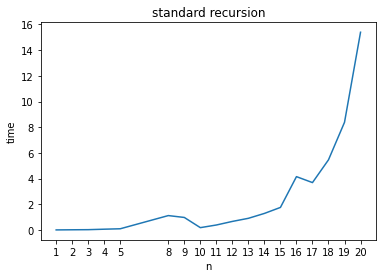

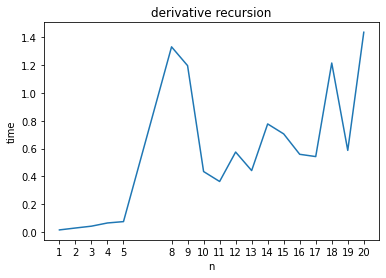

In [3]:
#for 10 decimal places and bounds from -1.3 to 3.1

#polynomials of degree 6 and 7 somehow do not work
t1 = [0.005394458770751953, 0.01612377166748047, 0.0247647762298584, 0.061189889907836914, 0.09467649459838867, 
     1.1214079856872559, 0.9758336544036865, 0.18241286277770996, 0.38808345794677734, 0.6670103073120117, 0.9090328216552734,
     1.2900075912475586,1.7568857669830322, 4.153651237487793, 3.6900689601898193, 5.463710308074951, 8.384576320648193
     , 15.396108627319336]
n = [1,2,3,4,5,8,9, 10, 11, 12 ,13,14, 15, 16, 17, 18, 19, 20 ]

t2 = [0.013807535171508789, 0.02754807472229004,0.04077267646789551, 0.06385016441345215,0.07366609573364258, 1.3325331211090088
     , 1.197188138961792, 0.4343435764312744,0.3626725673675537, 0.5747215747833252, 0.44115662574768066,0.7772135734558105
     ,0.7054336071014404,0.5585165023803711, 0.5420775413513184,1.2159323692321777,0.5867829322814941, 1.437687873840332  ]

plt.plot(n,t1)
plt.title('standard recursion')
plt.ylabel('time')
plt.xlabel('n')
plt.xticks(n)
plt.show()

plt.plot(n,t2)
plt.title('derivative recursion')
plt.ylabel('time')
plt.xlabel('n')
plt.xticks(n)
plt.show()
